In [5]:
%load_ext autoreload
%autoreload 2


%matplotlib inline

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [6]:
%cd C:\MAD4AG

import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

C:\MAD4AG


In [7]:


# List the CSV files in the directory
directory = r'.\dbs\twins'
simulation_days = [file for file in os.listdir(directory) if file.endswith('-day.pkl')]
simulation_days

['03-13-simulation-0-day.pkl',
 '03-13-simulation-1-day.pkl',
 '03-13-simulation-2-day.pkl',
 '03-13-simulation-3-day.pkl',
 '03-13-simulation-4-day.pkl']

In [8]:
count = 0

# Loop through each CSV file and combine the data
for file in simulation_days:
    # Read the CSV file into a DataFrame
    if count==0:
        combined_df = pd.read_pickle(os.path.join(directory, file))
        combined_df.rename(columns={'act_seq_simp':'act_seq_simp_'+str(count), 'sub_id':'sub_id_'+str(count)}, inplace=True)
    else:
        new_seq = pd.read_pickle(os.path.join(directory, file))
        new_seq.rename(columns={'act_seq_simp':'act_seq_simp_'+str(count), 'sub_id':'sub_id_'+str(count)}, inplace=True)
        combined_df = pd.merge(combined_df, new_seq[['uid','act_seq_simp_'+str(count),'sub_id_'+str(count)]], on='uid', how='left')
    count+=1


In [9]:
combined_df['unique_sub_id'] = combined_df[['sub_id_0', 'sub_id_1', 'sub_id_2', 'sub_id_3', 'sub_id_4']].values.tolist()

In [10]:
def calculate_list_length(lst):
    lst = list(set(lst))
    return len(lst)

# Apply the function to each row in the specified column
combined_df['unique_sub_id'] = combined_df['unique_sub_id'].apply(calculate_list_length)

In [12]:
combined_df['unique_act_seq'] = combined_df[['act_seq_simp_0', 'act_seq_simp_1', 'act_seq_simp_2', 'act_seq_simp_3', 'act_seq_simp_4']].values.tolist()


<AxesSubplot:>

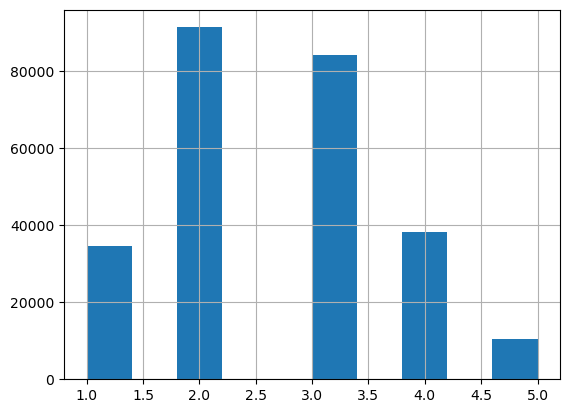

In [13]:
def calculate_list_length(lst):
    lst = list(set(lst))
    return len(lst)


# Apply the function to each row in the specified column
combined_df['unique_act_seq'] = combined_df['unique_act_seq'].apply(calculate_list_length)


C:\Users\aglar\AppData\Local\anaconda3\envs\pycharm\lib\site-packages\ipykernel_launcher.py:11: UserWarning: FixedFormatter should only be used together with FixedLocator
  # This is added back by InteractiveShellApp.init_path()


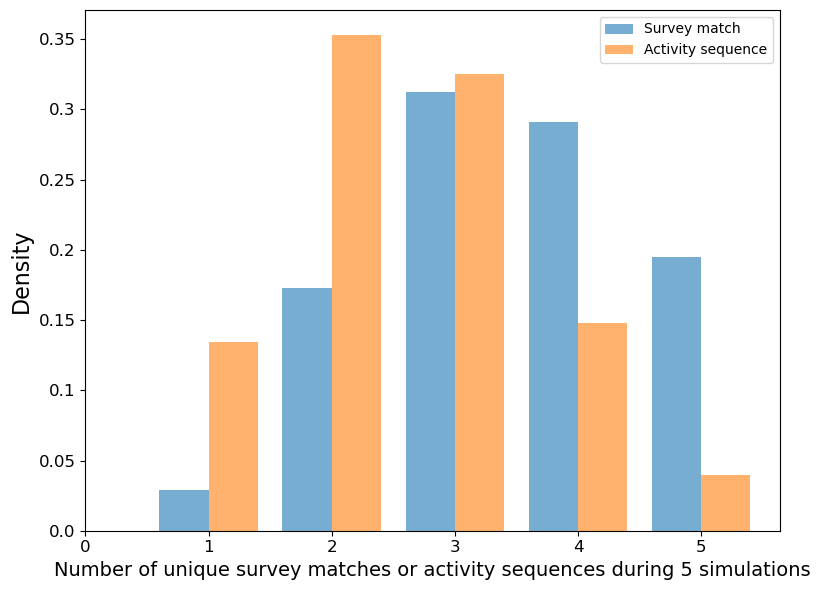

In [33]:
fig, (ax0) = plt.subplots(nrows=1, ncols=1, figsize = (8, 6))

all_data = [combined_df['unique_sub_id'],combined_df['unique_act_seq']]

ax0.hist(all_data, density=True, histtype='bar', label=['Survey match','Activity sequence'], alpha=0.6, bins=range(1,7,1))
ax0.legend( prop={'size': 10}, fontsize=14)
ax0.set_xlabel('Number of unique survey matches or activity sequences during 5 simulations', fontsize=14)
# ax0.set_title('Range [0, 15%]', fontsize=14)
# #ax0.set_xticklabels(np.arange(-6, 31, step=6), fontsize=12)
ax0.set_xticks(np.arange(0.5, 6.5, step=1),range(0,6,1), fontsize=12)
ax0.set_yticklabels(np.round(np.arange(0, 0.4, step=0.05),2), fontsize=12)
ax0.set_ylabel('Density', fontsize=16)



#fig.suptitle('Detected homes vs population', fontsize=14)

fig.tight_layout()
plt.savefig("./figures/multiple_days_histogram.png")
